In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset


In [37]:
path= r"/content/Global_Superstore2.csv"

In [38]:
df=pd.read_csv(path,sep=",", encoding='latin-1')

In [39]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [41]:
df.shape

(51290, 24)

**Clean Data**

In [42]:
#data cleaning-handling missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [43]:
#identifying duplicate values
df.duplicated().sum()

0

In [44]:
# dropping the affected rows/columns
df.drop('Postal Code',axis=1,inplace=True)
print("removed affected rows/columns.")

removed affected rows/columns.


In [45]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


**Statistical Analysis:**

In [46]:
import numpy as np
from scipy import stats

In [56]:
#handle outliers using statistical techniques like IQR

#IQR of Sales attributes
Q3=df['Sales'].quantile(0.25)
Q1=df['Sales'].quantile(0.75)
IQR=Q3-Q1
Lower_bound=Q1-(1.5*IQR)
Upper_bound=Q3+(1.5*IQR)
print("Lower bound of Sales attributes",Lower_bound)
print("Upper bound of Sales attributes",Upper_bound)
print("IQR of Sales attributes",IQR)

Lower bound of Sales attributes 581.4950625
Upper bound of Sales attributes -299.6832375
IQR of Sales attributes -220.294575


In [73]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [63]:
prof_mean=df["Profit"].mean()
sale_mean=df["Sales"].mean()
print(prof_mean)
print(sale_mean)

28.61098247767596
246.49058120257362


In [64]:
prof_med=df["Profit"].median()
sale_med=df["Sales"].median()
print(prof_med)
print(sale_med)

9.24
85.053


In [65]:
prof_std=df["Profit"].std()
sale_std=df["Sales"].std()
print(prof_mean)
print(sale_mean)

28.61098247767596
246.49058120257362


In [66]:
prof_var=df["Profit"].var()
sale_var=df["Sales"].var()
print(prof_var)
print(sale_var)

30394.774483046996
237719.9807970923


In [69]:
# Compute the correlation matrix only for numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Display the correlation matrix
print(correlation_matrix)


                 Row ID     Sales  Quantity  Discount    Profit  Shipping Cost
Row ID         1.000000 -0.043889 -0.173483  0.087594 -0.019037      -0.039078
Sales         -0.043889  1.000000  0.313577 -0.086722  0.484918       0.768073
Quantity      -0.173483  0.313577  1.000000 -0.019875  0.104365       0.272649
Discount       0.087594 -0.086722 -0.019875  1.000000 -0.316490      -0.079056
Profit        -0.019037  0.484918  0.104365 -0.316490  1.000000       0.354441
Shipping Cost -0.039078  0.768073  0.272649 -0.079056  0.354441       1.000000


**Data Visualization:**

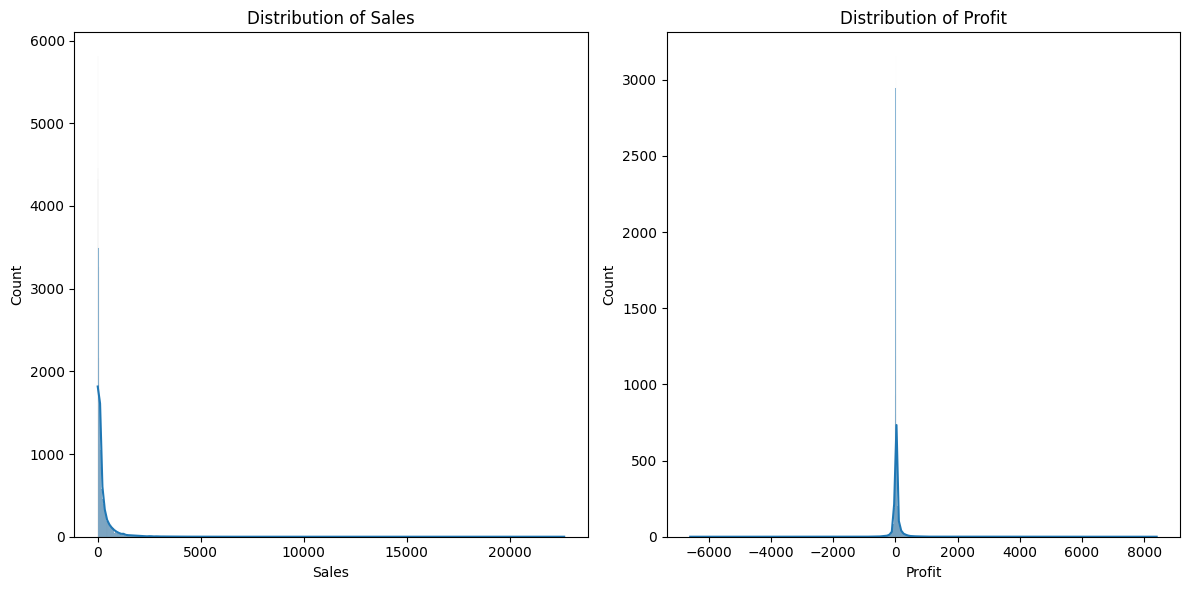

In [70]:
# Histograms for numerical data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')

plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()

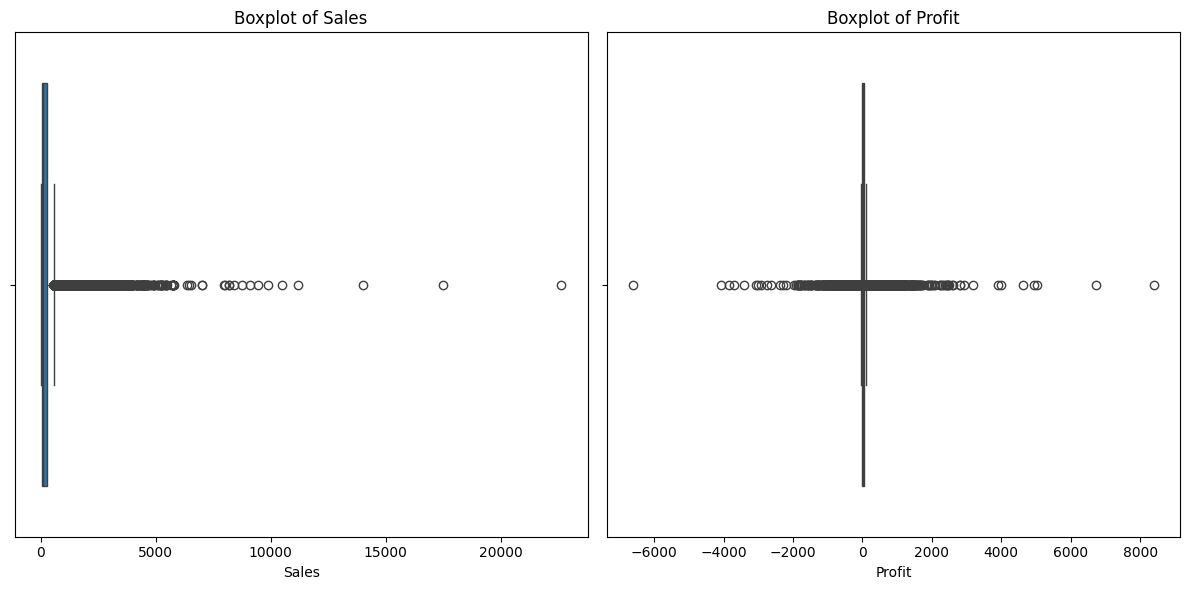

In [71]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')

plt.tight_layout()
plt.show()

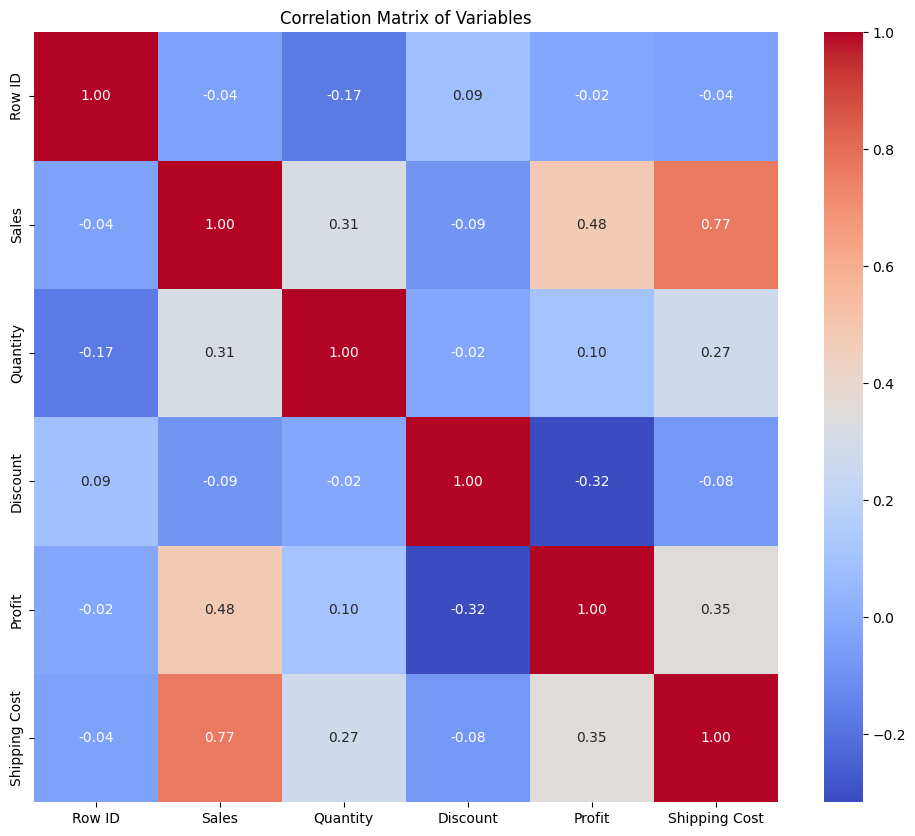

In [72]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()